# Credit Card Fraud Detection

In this notebook I will look to put together a credit card fraud detection algorithm. The dataset is too large for github and can be found here (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

First our dependencies  

In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn import preprocessing, svm 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
import torch
import seaborn as sns
from collections import Counter


# Later I will try to use s decision tree to see if it outperforms the other methods I will attempt in this notebook.
from Decision_tree_classifier import *
from Useful_tools import *



In [58]:
# Bringing the data into pandas so we can begin our analysis.

df = pd.read_csv('creditcard.csv')

In [59]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


As we can see there is this anonymized data that includes the 28 felids that represent some data about the transactions, an amount and a classification of fraud or not fraud. 

In [60]:
# To see the datatypes of our dataframe, as we can see the are all float 64s 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [61]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Now to see the numebr of instances of fraud vs no fraud. We can see that the number of fraud cases is much larger than the no fraud cases. 

In [62]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


In [63]:
# Separating the feature set from the target variable

feature_set = df.drop('Class', axis=1)
target_set = df['Class']

In [64]:
# To do our train test split of the data.

X_train, X_test, y_train, y_test = train_test_split(feature_set,target_set, test_size= 0.25 , random_state= 42)


In [65]:
# Notice here how I have increased the maximum number of iterations from the usual 100, given the number of features and the size of the dataset more than the standard is needed

logistic_regression_model = LogisticRegression(max_iter=1000)

logistic_regression_model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [66]:
# Running our test data through the model

predictions = logistic_regression_model.predict(X_test)


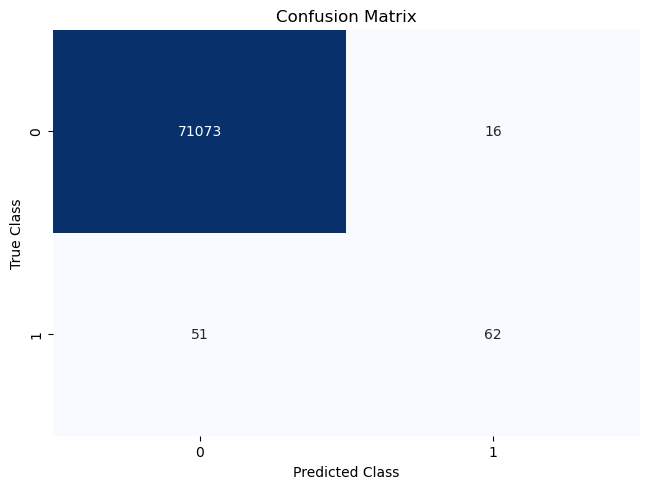

In [67]:
matrix = confusion_matrix(y_test, predictions)

dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

To evaluate the model above we are going to consider the precision and the recall. 

The precision is important because we want to know what our ratio of true positives are to total positives are. This tells use how often are we getting the wrong person. For fraud detection is is a measure of how much time the algorithm will waste by pursuing false positives. A number closer to one is better in this case. An algorithm that identifies everyone as fraudulent would catch every case of fraud but would be pointless. 

The recall is important because it tells us how many of the target category the model "missed". The ideal score is closer to 1. 


In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.79      0.55      0.65       113

    accuracy                           1.00     71202
   macro avg       0.90      0.77      0.82     71202
weighted avg       1.00      1.00      1.00     71202



Now I will look to compare this to the classification tree that I have built in other notebooks in this repository. 

In [69]:
# Calling the decision tree classifier from SK learn 

clf = DecisionTreeClassifier()

In [70]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [71]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

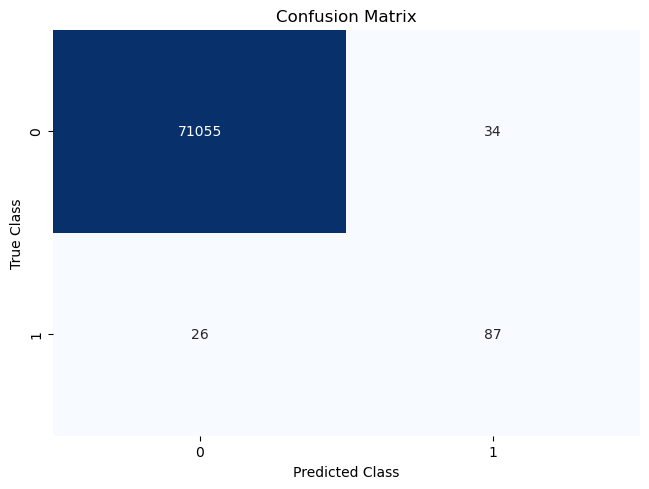

In [72]:
matrix = confusion_matrix(y_test, y_pred)

dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [73]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.72      0.77      0.74       113

    accuracy                           1.00     71202
   macro avg       0.86      0.88      0.87     71202
weighted avg       1.00      1.00      1.00     71202



As we can see the decision tree outperforms the logistic regression on the same data, on both precision and recall.

Lastly we are going to try a deep learning model on the same data. 

In [74]:
# The first thing that we need to do is to scale the data so we don't end up with gradient explosion issues. 


# Original dataset
x = feature_set.values
y = target_set.values
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

print('Sampled train dataset shape %s' % Counter(y_train1))
print('Sampled validation dataset shape %s' % Counter(y_test1))

Sampled train dataset shape Counter({0: 227451, 1: 394})
Sampled validation dataset shape Counter({0: 56864, 1: 98})


In [75]:
# time to bring it into pytorch and the torch dataloaders
batch_size = 64

numeber_of_cores = 0

training_dataset =  torch.utils.data.TensorDataset(torch.tensor(X_train1).float(), torch.tensor(y_train1).float())
test_dataset =      torch.utils.data.TensorDataset(torch.tensor(X_test1).float(), torch.tensor(y_test1).float())

train_dataloader = torch.utils.data.DataLoader(training_dataset,batch_size=batch_size, num_workers = numeber_of_cores)
test_dataloader = torch.utils.data.DataLoader(test_dataset,batch_size=batch_size, num_workers = numeber_of_cores)

In [76]:
class Classifier(torch.nn.Module):
    def __init__(self,n_input =10 , n_hidden = 15, n_output = 4, drop_prob = 0.5):
        super().__init__()
        self.extractor1 = torch.nn.Linear(n_input, n_hidden)
        self.extractor2 = torch.nn.Linear(n_hidden, n_hidden)
        self.relu = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(drop_prob)
        self.classifier = torch.nn.Linear(n_hidden,n_output)
        
    def forward(self, x_batch):
        x = self.relu(self.extractor1(x_batch))
        x = self.relu(self.extractor2(x))
        x = self.dropout(x)
        return self.classifier(x).squeeze()

In [77]:
def loss(model, loss_function, x_batch , y_batch, opt = None):
    loss = loss_function(model(x_batch),y_batch)
    if opt is not None:
            loss.backward()
            opt.step()
            opt.zero_grad()
    return loss.item(), len(x_batch)

In [78]:
def train(model, epochs, loss_function, opt, train_dl, test_dl):
    for epoch in range(epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            loss(model, loss_function,x_batch,y_batch,opt)
        model.eval()
        with torch.no_grad():
            losses, nums = zip(*[loss(model, loss_function, xb, yb) for xb, yb in test_dl])
        test_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        print(epoch, test_loss)
        

In [79]:
n_input = X_train1.shape[1]
n_output = 1
n_hidden = 15

model = Classifier(n_input=n_input,n_hidden=n_hidden,n_output=n_output,drop_prob=0.2)

lr = 0.001
    
pos_weight = torch.tensor([5])
opt = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
loss_func = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)

n_epoch = 60



In [80]:
train(model,n_epoch,loss_func,opt,train_dataloader,test_dataloader)
model.eval()

0 0.045979134650809855
1 0.04446816525597078
2 0.042604775786387286
3 0.03945653231633412
4 0.035083620741035756
5 0.030846577382172256
6 0.027092317249712904
7 0.023936423051265605
8 0.021323470456400706
9 0.019289948248946094
10 0.017458216051201333
11 0.016292879066709714
12 0.014932591604519282
13 0.014540740054107684
14 0.013377164563081776
15 0.01306812161946162
16 0.012511351181610193
17 0.012360665667942704
18 0.01210321293407593
19 0.011833171703967521
20 0.012016119678127378
21 0.011782368364050031
22 0.011337160676066901
23 0.011430061176680334
24 0.011305206283518348
25 0.011181746844783944
26 0.011003260229680567
27 0.011311557042753486
28 0.010846579783346239
29 0.010979206437139523
30 0.011167409090224324
31 0.011002431253966608
32 0.01081329149299584
33 0.010689313676800647
34 0.010743117331464422
35 0.010897279924442877
36 0.010884978500594144
37 0.010762687379461022
38 0.010950410697647248
39 0.010590120046137444
40 0.010587739817216604
41 0.01065177696368447
42 0.010

Classifier(
  (extractor1): Linear(in_features=30, out_features=15, bias=True)
  (extractor2): Linear(in_features=15, out_features=15, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (classifier): Linear(in_features=15, out_features=1, bias=True)
)

In [81]:
ypred = model(torch.tensor(X_test1).float()).detach().numpy()

ypred [ypred>=0.5] =1.0
ypred [ypred<0.5] =0.0
print(metrics.classification_report(y_test1, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.80      0.79        98

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



As we can see here the deep learning model as performed significantly better than the logistic regression model and beats out the decision tree. The training time remains reasonable, unlike the decision tree module. It does help that it can be trained with 4 parallel treads which the decision tree code I wrote cannot. 